# Monte Carlo Simulation for American & European Option Pricing

### Thomas Polstra, PhD

##### [GitHub](https://github.com/thomaspolstra/Quant_Materials_Polstra_Public.git) -- [Academic Website](https://thomaspolstra.github.io/) -- [Email](mailto:thomaspolstra@gmail.com)

## Purpose:
- Implement Monte Carlo simulation techniques for pricing European and American options
- Write functions that can be used in financial research projects.

## Notebook Overview

1. Introduction to European Options and the Black-Scholes Model: Before diving into the Monte Carlo simulation, we will provide a brief overview of European options, their characteristics, and the theoretical pricing model using the famous Black-Scholes formula.

2. Implementing the Monte Carlo Simulation: In this section, we will define the parameters for the simulation, including the number of simulations, time steps, and option contract details. We will then simulate multiple price paths for the underlying asset and calculate the option's payoff at expiration for each path.

3. Calculating Option Price: Using the simulated payoffs, we will discount them to their present value using the risk-free interest rate and obtain the estimated option price using Monte Carlo methods.

4. Comparing with Black-Scholes: Lastly, we will compare the estimated option price obtained from the Monte Carlo simulation with the theoretical price calculated using the Black-Scholes formula. This will help validate the accuracy of our Monte Carlo approach.


# Part 1: Introduction to European Options and the Black-Scholes Model

## European Options

European options are a type of financial derivative that gives the holder the right, but not the obligation, to buy (call option) or sell (put option) an underlying asset at a fixed price (strike price) on or before a specific date (expiration date). Unlike American options, European options can only be exercised at the expiration date. 

The payoff from a European call option at expiration is given by: 
Payoff = max(0, Spot Price - Strike Price)

The payoff from a European put option at expiration is given by: 
Payoff = max(0, Strike Price - Spot Price)

## The Black-Scholes Model

The Black-Scholes model is a widely used mathematical model for pricing European options. It was developed by economists Fischer Black and Myron Scholes in 1973 and later extended by Robert Merton. The Black-Scholes model provides an analytical solution for calculating the theoretical fair value of European call and put options. The formula takes into account various parameters, including the current price of the underlying asset, the option's strike price, the time to expiration, the risk-free interest rate, and the asset's volatility.

The formula for the Black-Scholes option pricing model for a European call option is:
Call Option Price = S * N(d1) - X * e^(-r * T) * N(d2)

And for a European put option:
Put Option Price = X * e^(-r * T) * N(-d2) - S * N(-d1)

Where:
- S is the current price of the underlying asset (spot price).
- X is the option's strike price.
- r is the risk-free interest rate.
- T is the time to expiration in years.
- N(d1) and N(d2) are cumulative standard normal distribution functions.
- d1 = (ln(S/X) + (r + 0.5 * σ^2) * T) / (σ * √T)
- d2 = d1 - σ * √T

In this notebook, we will use the Black-Scholes formula as a benchmark to compare the results obtained from the Monte Carlo simulation for European option pricing. We will proceed to implement the Monte Carlo method in subsequent parts to estimate option prices in situations where analytical solutions are not readily available.

Let's move on to Part 2, where we will implement the Monte Carlo simulation.


# Part 2: Introduction to Monte Carlo Simulation for Option Pricing

Monte Carlo simulation is a powerful computational technique used in finance and various other fields to estimate complex mathematical problems. In the context of option pricing, Monte Carlo simulation allows us to calculate the value of an option by generating random samples of the underlying asset's future prices and analyzing the option's payoff for each sample.

**How Monte Carlo Simulation Works for Option Pricing:**

1. **Modeling the Underlying Asset:** To begin, we model the price behavior of the underlying asset. The most common model is the geometric Brownian motion, which assumes that the asset's price follows a stochastic process influenced by its volatility and drift (expected return).

2. **Generating Random Samples:** Next, we generate a large number of random samples for the future prices of the underlying asset. These samples are drawn from a random distribution, usually a normal distribution with a mean of 0 and a standard deviation of 1.

3. **Calculating Payoff:** For each random sample, we calculate the option's payoff at the option's expiration date. The payoff for a European call option is the maximum of zero and the difference between the asset's price and the strike price. Similarly, the payoff for a European put option is the maximum of zero and the difference between the strike price and the asset's price.

4. **Discounting Payoff to Present Value:** Since the payoff occurs in the future, we need to discount it to its present value using the risk-free interest rate. This accounts for the time value of money.

5. **Averaging Payoff:** We repeat steps 2 to 4 a large number of times (specified by the number of Monte Carlo simulations) and calculate the average of all the discounted payoffs. This average value represents the estimated option price.

Monte Carlo simulation is particularly useful when analytical solutions for option pricing are not available or when the option's pricing formula is complex. The technique's accuracy depends on the number of simulations performed; the more simulations, the more precise the estimate becomes. However, increasing the number of simulations also increases computational time, so there's a trade-off between accuracy and computation time.

In what follows, a function is provided which allows us to perform a Monte-Carlo simulation.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_european_option(S, K, r, T, sigma, option_type, num_simulations):
    """
    Calculate the price of a European option using Monte Carlo simulation.

    Parameters:
    S (float): Current price of the underlying asset (spot price).
    K (float): Option's strike price.
    r (float): Risk-free interest rate.
    T (float): Time to expiration in years.
    sigma (float): Volatility of the underlying asset.
    option_type (str): 'call' for call option, 'put' for put option.
    num_simulations (int): Number of Monte Carlo simulations.

    Returns:
    float: Estimated option price.
    """

    dt = T / 252  # Assuming 252 trading days in a year
    total_payoff = 0

    for _ in range(num_simulations):
        # Generate random samples for the asset's price at expiration
        Z = np.random.standard_normal()
        S_T = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

        # Calculate the option's payoff at expiration
        if option_type == 'call':
            payoff = max(0, S_T - K)
        elif option_type == 'put':
            payoff = max(0, K - S_T)

        # Discount the payoff to present value
        discounted_payoff = payoff * np.exp(-r * T)
        total_payoff += discounted_payoff

    # Calculate the average payoff and return the option price
    option_price = total_payoff / num_simulations
    return option_price


In [13]:
# Example parameters
spot_price = 100  # Current price of the underlying asset
strike_price = 110  # Option's strike price
risk_free_rate = 0.05  # Risk-free interest rate
time_to_expiration = 1  # Time to expiration in time units
volatility = 0.2  # Volatility of the underlying asset
option_type = 'call'  # 'call' for call option, 'put' for put option
num_simulations = 100000  # Number of Monte Carlo simulations

# Estimate the option price using the Monte Carlo simulation
option_price = monte_carlo_european_option(spot_price, strike_price, risk_free_rate, time_to_expiration, volatility, option_type, num_simulations)

print(f"Estimated European call option price: {option_price:.2f}")


Estimated European call option price: 6.07


# Part 3: Monte Carlo vs. Black-Scholes Option Pricing

We compare option prices of European calls obtained through Black-Scholes and Monte-Carlo Methods

## Data Collection

To perform the Monte Carlo simulation and compare it with the Black-Scholes model, we will consider a call option on the Robinhood platform for the Home Depot stock (ticker: 'HD'). The stock is currently valued at 330.63. The call option has the following details:

- Spot Price: 330.63
- Strike Price: 335
- Trading Days Until Expiration: 6
- Premium: 2.07

We will use this option data to calculate the implied volatility using the Black-Scholes model. Then, we will implement the Monte Carlo simulation to estimate the option price and compare it with the Black-Scholes result. Our goal is to test the hypothesis that the prices obtained from Monte Carlo and Black-Scholes methods are significantly different. Let's proceed with the analysis.

## Functions

In [14]:
import numpy as np
from scipy.stats import norm

def black_scholes_option(S, K, T, r, sigma, q=0, option_type='call'):
    """
    Calculate the price of a European option using the Black-Scholes formula.

    Parameters:
    S (float): Current price of the underlying asset (spot price).
    K (float): Option's strike price.
    T (float): Time to expiration in years.
    r (float): Risk-free interest rate.
    sigma (float): Volatility of the underlying asset.
    q (float, optional): Annual dividend rate. Default is 0.
    option_type (str): 'call' for call option, 'put' for put option.

    Returns:
    float: Estimated option price.
    """
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price



def implied_volatility(call_price, S, K, T, r, tol=1e-6):
    """
    Calculate implied volatility for a call option using the bisection method.

    Parameters:
    call_price (float): Market price of the call option.
    S (float): Current price of the underlying asset (spot price).
    K (float): Option's strike price.
    T (float): Time to expiration in years.
    r (float): Risk-free interest rate.
    tol (float): Tolerance for convergence of the bisection method.

    Returns:
    float: Implied volatility.
    """
    def objective_function(sigma):
        return black_scholes_option(S, K, T, r, sigma, 0, 'call') - call_price

    # Set lower and upper bounds for volatility
    sigma_low = 0.001
    sigma_high = 2.0

    # Use bisection method to find implied volatility
    implied_volatility = opt.bisect(objective_function, sigma_low, sigma_high, xtol=tol)

    return implied_volatility


def geo_paths(S, T, r, q, sigma, steps, N):
    dt = T / steps
    ST = S * np.exp(np.cumsum(((r - q - sigma**2 / 2) * dt +
                               sigma * np.sqrt(dt) *
                               np.random.normal(size=(steps, N))), axis=0))
    return ST


## Function Tests

We will verify the accuracy of our functions by comparing the Monte Carlo pricing simulation results with the Black-Scholes option values for the HD call option.

Simulated price is 2.08839859261794
Black Scholes Option Price is 2.035076674358052


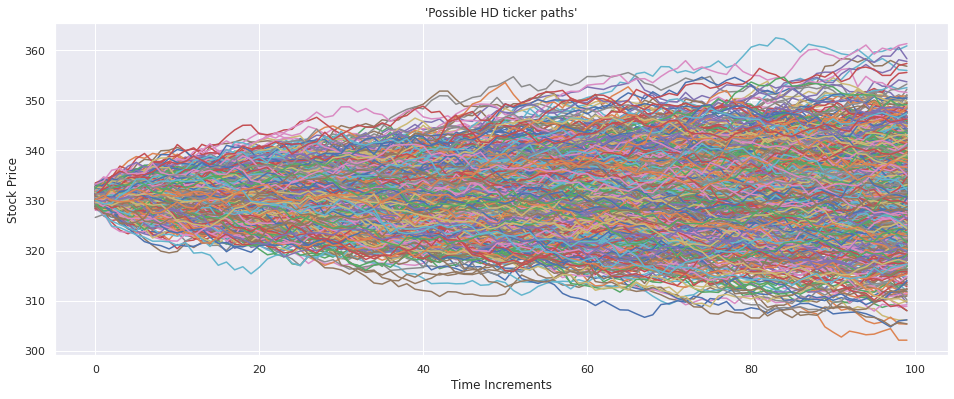

In [15]:
S = 330.63  # stock price S_{0}
K = 335  # strike
T = 6/252  # time to maturity
r = .05  # risk-free rate in annual %
q = 0  # annual dividend rate
sigma = .18  # annual volatility in %
steps = 100  # time steps
N = 1000  # number of trials

#S, K, T, r, sigma, option_type
#bs_price = black_scholes_option(S, K, T, r, q, sigma, 'call')

paths = geo_paths(S, T, r, q, sigma, steps, N)
plt.plot(paths)
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("'Possible HD ticker paths'")


option_price = np.mean(payoffs) * np.exp(-r * T)  # discounting back to present value


print(f"Simulated price is {option_price}")



bs_price2 = black_scholes_option(S, K, T, r, sigma, q, 'call')


print(f"Black Scholes Option Price is {bs_price2}")



## Introduction to American Options

American options are a type of financial derivative that grants the holder the right, but not the obligation, to buy (in the case of a call option) or sell (in the case of a put option) an underlying asset at a predetermined price (strike price) on or before the option's expiration date. The key distinction between American and European options lies in the exercise feature. While European options can only be exercised at expiration, American options provide the flexibility to exercise at any time until maturity.

The early exercise feature of American options adds complexity to the valuation process. Unlike European options, which can be priced using the Black-Scholes formula or other analytical methods, American options require numerical techniques like the Monte Carlo simulation to estimate their fair value accurately.

One of the significant challenges in pricing American options is determining the optimal exercise strategy. As the option approaches its expiration date, the holder faces a decision: whether to exercise the option immediately or hold on to it. This decision depends on various factors, such as the underlying asset's price, volatility, risk-free interest rate, and the option's time to maturity.

The Monte Carlo simulation is a powerful numerical method used in finance to estimate the value of American options. By simulating numerous possible price paths for the underlying asset and incorporating the early exercise feature, we can obtain a more accurate estimate of the option's fair value compared to traditional analytical methods.

In this notebook, we will delve into implementing the Monte Carlo simulation for pricing American options. We will define the necessary parameters, simulate multiple price paths for the underlying asset, calculate the option's payoff at each time step, and incorporate the early exercise decision. Finally, we will obtain the estimated option price using Monte Carlo methods and compare it with analytical solutions to validate the accuracy of our approach.

We adjust the European Monte-Carlo pricing function to price American Options.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_american_option(S, K, r, T, sigma, option_type, num_simulations, num_steps):
    """
    Calculate the price of an American option using Monte Carlo simulation.

    Parameters:
    S (float): Current price of the underlying asset (spot price).
    K (float): Option's strike price.
    r (float): Risk-free interest rate.
    T (float): Time to expiration in years.
    sigma (float): Volatility of the underlying asset.
    option_type (str): 'call' for call option, 'put' for put option.
    num_simulations (int): Number of Monte Carlo simulations.
    num_steps (int): Number of time steps in the simulation.

    Returns:
    float: Estimated option price.
    """

    dt = T / num_steps
    total_payoff = 0

    for _ in range(num_simulations):
        S_t = S
        for _ in range(num_steps):
            # Generate random sample for asset's price movement
            Z = np.random.standard_normal()
            S_t *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

            # Calculate the option's payoff at each step
            if option_type == 'call':
                payoff = max(0, S_t - K)
            elif option_type == 'put':
                payoff = max(0, K - S_t)

            # Check for early exercise and update the payoff accordingly
            if option_type == 'call':
                payoff = max(payoff, S_t - K)
            elif option_type == 'put':
                payoff = max(payoff, K - S_t)

        # Discount the payoff to present value
        discounted_payoff = payoff * np.exp(-r * T)
        total_payoff += discounted_payoff

    # Calculate the average payoff and return the option price
    option_price = total_payoff / num_simulations
    return option_price


In [22]:
# Example parameters
spot_price = 330.63  # Current price of the underlying asset
strike_price = 335  # Option's strike price
risk_free_rate = 0.05  # Risk-free interest rate
time_to_expiration = 6/252  # Time to expiration in time units
volatility = 0.18  # Volatility of the underlying asset
option_type = 'call'  # 'call' for call option, 'put' for put option
num_simulations = 1000  # Number of Monte Carlo simulations
num_steps = 200

# Estimate the option price using the Monte Carlo simulation
option_price = monte_carlo_american_option(spot_price, strike_price, risk_free_rate, time_to_expiration, volatility, option_type, num_simulations, num_steps)

print(f"Estimated American call option price: {option_price:.2f}")


Estimated American call option price: 2.28
